In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

In [4]:
df_min=df[df['9']==1]

In [5]:
df_min.to_csv('wisconsin_minority_train.csv',index=False)
df_min=pd.read_csv('wisconsin_minority_train.csv')

In [6]:
df_majority=df[df['9']==0]
df_majority.to_csv('wisconsin_majority_train.csv',index=False)
df_majority=pd.read_csv('wisconsin_majority_train.csv')

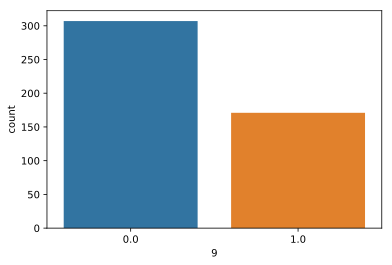

In [7]:
%matplotlib inline
sns.countplot(x='9',data=df)

In [8]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [9]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(165, 5, 10)
(165, 10)


In [10]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [11]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(10))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2480      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 2,690
Trainable params: 2,690
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
history=model.fit(Xtrain,Ytrain,epochs=500,verbose=1)

Epoch 1/500
99/99 [==============================] - 3s 29ms/step - loss: 0.3461
Epoch 2/500
99/99 [==============================] - 0s 689us/step - loss: 0.3115
Epoch 3/500
99/99 [==============================] - 0s 658us/step - loss: 0.2793
Epoch 4/500
99/99 [==============================] - 0s 679us/step - loss: 0.2512
Epoch 5/500
99/99 [==============================] - 0s 658us/step - loss: 0.2268
Epoch 6/500
99/99 [==============================] - 0s 679us/step - loss: 0.2052
Epoch 7/500
99/99 [==============================] - 0s 841us/step - loss: 0.1856
Epoch 8/500
99/99 [==============================] - 0s 805us/step - loss: 0.1685
Epoch 9/500
99/99 [==============================] - 0s 739us/step - loss: 0.1530
Epoch 10/500
99/99 [==============================] - 0s 658us/step - loss: 0.1398
Epoch 11/500
99/99 [==============================] - 0s 668us/step - loss: 0.1278
Epoch 12/500
99/99 [==============================] - 0s 658us/step - loss: 0.1185
Epoch 13/500
9

99/99 [==============================] - 0s 648us/step - loss: 0.0895
Epoch 100/500
99/99 [==============================] - 0s 708us/step - loss: 0.0895
Epoch 101/500
99/99 [==============================] - 0s 668us/step - loss: 0.0896
Epoch 102/500
99/99 [==============================] - 0s 648us/step - loss: 0.0896
Epoch 103/500
99/99 [==============================] - 0s 638us/step - loss: 0.0894
Epoch 104/500
99/99 [==============================] - 0s 646us/step - loss: 0.0893
Epoch 105/500
99/99 [==============================] - 0s 668us/step - loss: 0.0892
Epoch 106/500
99/99 [==============================] - 0s 731us/step - loss: 0.0891
Epoch 107/500
99/99 [==============================] - 0s 648us/step - loss: 0.0893
Epoch 108/500
99/99 [==============================] - 0s 643us/step - loss: 0.0892
Epoch 109/500
99/99 [==============================] - 0s 638us/step - loss: 0.0893
Epoch 110/500
99/99 [==============================] - 0s 663us/step - loss: 0.0892
Epoch 

99/99 [==============================] - 0s 638us/step - loss: 0.0855
Epoch 197/500
99/99 [==============================] - 0s 709us/step - loss: 0.0852
Epoch 198/500
99/99 [==============================] - 0s 699us/step - loss: 0.0847
Epoch 199/500
99/99 [==============================] - 0s 638us/step - loss: 0.0846
Epoch 200/500
99/99 [==============================] - 0s 658us/step - loss: 0.0854
Epoch 201/500
99/99 [==============================] - 0s 628us/step - loss: 0.0855
Epoch 202/500
99/99 [==============================] - 0s 690us/step - loss: 0.0845
Epoch 203/500
99/99 [==============================] - 0s 633us/step - loss: 0.0840
Epoch 204/500
99/99 [==============================] - 0s 658us/step - loss: 0.0845
Epoch 205/500
99/99 [==============================] - 0s 699us/step - loss: 0.0849
Epoch 206/500
99/99 [==============================] - 0s 673us/step - loss: 0.0846
Epoch 207/500
99/99 [==============================] - 0s 679us/step - loss: 0.0843
Epoch 

99/99 [==============================] - 0s 668us/step - loss: 0.0806
Epoch 294/500
99/99 [==============================] - 0s 668us/step - loss: 0.0804
Epoch 295/500
99/99 [==============================] - 0s 709us/step - loss: 0.0792
Epoch 296/500
99/99 [==============================] - 0s 648us/step - loss: 0.0788
Epoch 297/500
99/99 [==============================] - 0s 638us/step - loss: 0.0787
Epoch 298/500
99/99 [==============================] - 0s 668us/step - loss: 0.0796
Epoch 299/500
99/99 [==============================] - 0s 648us/step - loss: 0.0797
Epoch 300/500
99/99 [==============================] - 0s 668us/step - loss: 0.0792
Epoch 301/500
99/99 [==============================] - 0s 628us/step - loss: 0.0788
Epoch 302/500
99/99 [==============================] - 0s 648us/step - loss: 0.0785
Epoch 303/500
99/99 [==============================] - 0s 719us/step - loss: 0.0791
Epoch 304/500
99/99 [==============================] - 0s 628us/step - loss: 0.0800
Epoch 

99/99 [==============================] - 0s 775us/step - loss: 0.0745
Epoch 391/500
99/99 [==============================] - 0s 830us/step - loss: 0.0754
Epoch 392/500
99/99 [==============================] - 0s 795us/step - loss: 0.0760
Epoch 393/500
99/99 [==============================] - 0s 760us/step - loss: 0.0743
Epoch 394/500
99/99 [==============================] - 0s 780us/step - loss: 0.0751
Epoch 395/500
99/99 [==============================] - 0s 775us/step - loss: 0.0752
Epoch 396/500
99/99 [==============================] - 0s 810us/step - loss: 0.0744
Epoch 397/500
99/99 [==============================] - 0s 780us/step - loss: 0.0744
Epoch 398/500
99/99 [==============================] - 0s 775us/step - loss: 0.0751
Epoch 399/500
99/99 [==============================] - 0s 760us/step - loss: 0.0746
Epoch 400/500
99/99 [==============================] - 0s 790us/step - loss: 0.0751
Epoch 401/500
99/99 [==============================] - 0s 719us/step - loss: 0.0786
Epoch 

99/99 [==============================] - 0s 679us/step - loss: 0.0715
Epoch 488/500
99/99 [==============================] - 0s 704us/step - loss: 0.0716
Epoch 489/500
99/99 [==============================] - 0s 638us/step - loss: 0.0714
Epoch 490/500
99/99 [==============================] - 0s 653us/step - loss: 0.0714
Epoch 491/500
99/99 [==============================] - 0s 699us/step - loss: 0.0717
Epoch 492/500
99/99 [==============================] - 0s 628us/step - loss: 0.0709
Epoch 493/500
99/99 [==============================] - 0s 640us/step - loss: 0.0708
Epoch 494/500
99/99 [==============================] - 0s 608us/step - loss: 0.0709
Epoch 495/500
99/99 [==============================] - 0s 628us/step - loss: 0.0715
Epoch 496/500
99/99 [==============================] - 0s 648us/step - loss: 0.0700
Epoch 497/500
99/99 [==============================] - 0s 648us/step - loss: 0.0734
Epoch 498/500
99/99 [==============================] - 0s 648us/step - loss: 0.0714
Epoch 

In [14]:
model.save('7-24-2019-wisconsin-v1.h5')

In [15]:
Xtrain.shape

(99, 5, 10)

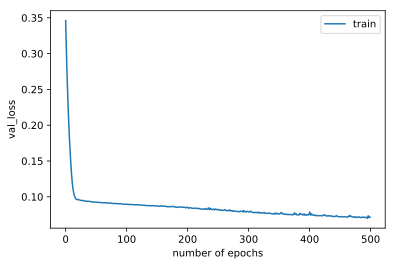

In [16]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [17]:
prediction=model.predict(xtest)

In [18]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

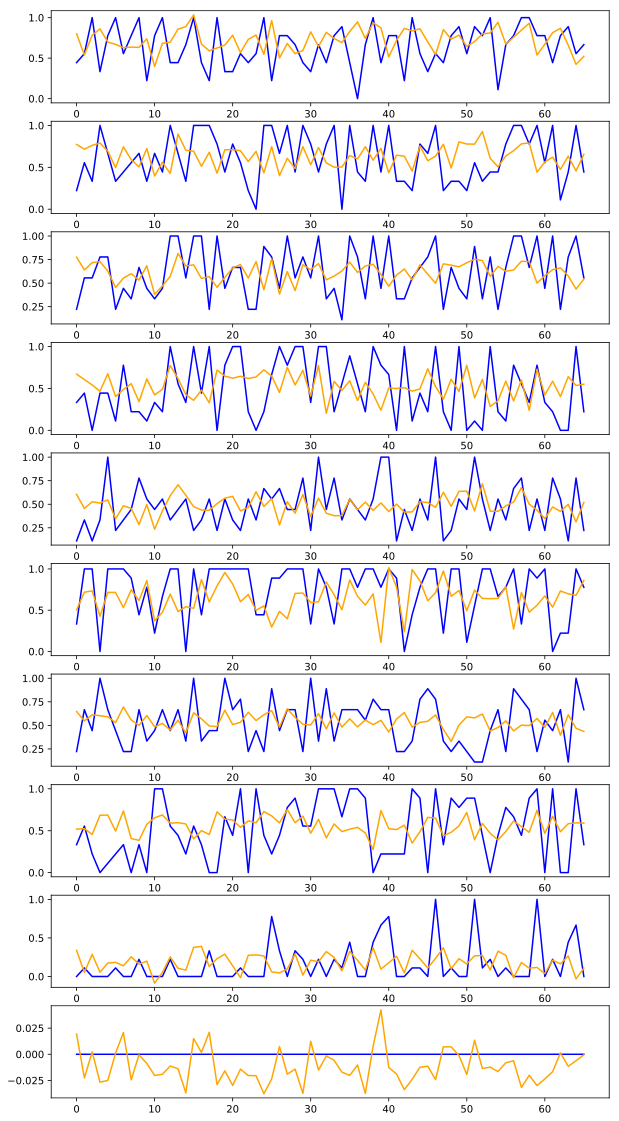

In [19]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [20]:
prediction

array([[ 8.01464260e-01,  7.72987485e-01,  7.76134551e-01,
         6.71090603e-01,  6.04640245e-01,  5.03131747e-01,
         6.47461653e-01,  5.19371510e-01,  3.39212596e-01,
         1.93305649e-02],
       [ 5.39285004e-01,  7.16521144e-01,  6.40161097e-01,
         6.06343150e-01,  4.55612749e-01,  7.18031049e-01,
         5.47455251e-01,  5.25030077e-01,  5.42048886e-02,
        -2.26125028e-02],
       [ 7.82167614e-01,  7.62449622e-01,  7.17338085e-01,
         5.41422725e-01,  5.26441455e-01,  7.33698606e-01,
         6.12544954e-01,  4.55804676e-01,  2.87248731e-01,
         2.27197632e-03],
       [ 8.61632049e-01,  7.89945960e-01,  7.28154123e-01,
         4.66623783e-01,  5.13046980e-01,  4.26710129e-01,
         6.02595210e-01,  6.85249627e-01,  5.58010191e-02,
        -2.66565643e-02],
       [ 6.97990716e-01,  6.92710936e-01,  6.27596378e-01,
         6.75327599e-01,  5.46185315e-01,  7.16325998e-01,
         5.91443062e-01,  6.86250091e-01,  1.74396440e-01,
        -2.

In [21]:
prediction2=scaler.inverse_transform(prediction)

In [22]:
ytest2=scaler.inverse_transform(ytest)

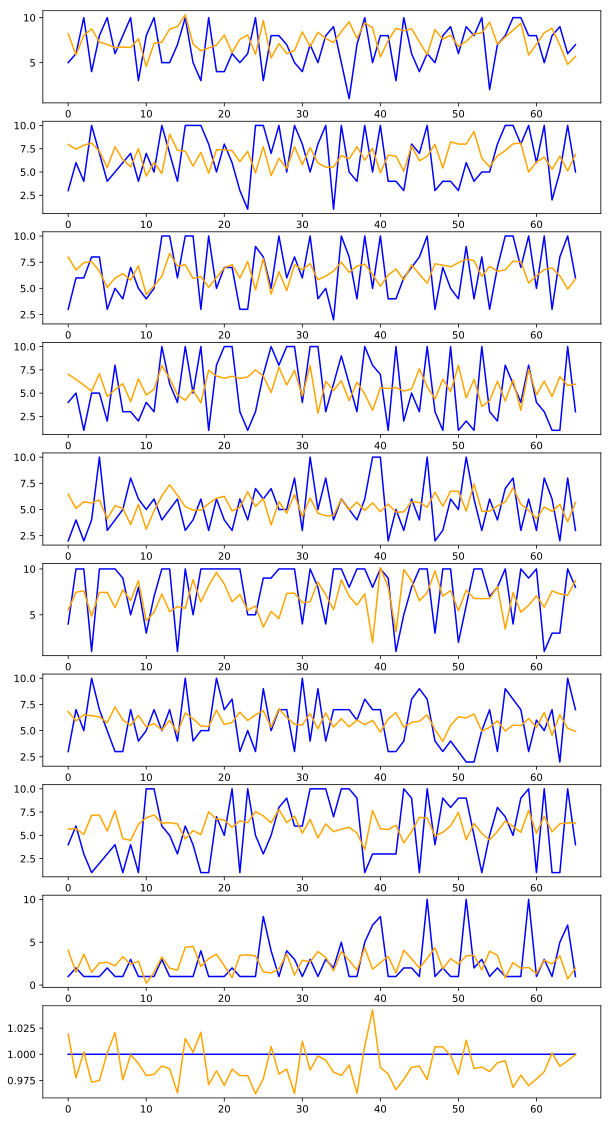

In [23]:
draw_prediction(ytest2,prediction2,clmns)

In [24]:
prediction

array([[ 8.01464260e-01,  7.72987485e-01,  7.76134551e-01,
         6.71090603e-01,  6.04640245e-01,  5.03131747e-01,
         6.47461653e-01,  5.19371510e-01,  3.39212596e-01,
         1.93305649e-02],
       [ 5.39285004e-01,  7.16521144e-01,  6.40161097e-01,
         6.06343150e-01,  4.55612749e-01,  7.18031049e-01,
         5.47455251e-01,  5.25030077e-01,  5.42048886e-02,
        -2.26125028e-02],
       [ 7.82167614e-01,  7.62449622e-01,  7.17338085e-01,
         5.41422725e-01,  5.26441455e-01,  7.33698606e-01,
         6.12544954e-01,  4.55804676e-01,  2.87248731e-01,
         2.27197632e-03],
       [ 8.61632049e-01,  7.89945960e-01,  7.28154123e-01,
         4.66623783e-01,  5.13046980e-01,  4.26710129e-01,
         6.02595210e-01,  6.85249627e-01,  5.58010191e-02,
        -2.66565643e-02],
       [ 6.97990716e-01,  6.92710936e-01,  6.27596378e-01,
         6.75327599e-01,  5.46185315e-01,  7.16325998e-01,
         5.91443062e-01,  6.86250091e-01,  1.74396440e-01,
        -2.

In [25]:
new_data=pd.DataFrame(prediction2)

In [26]:
new_data.to_csv('new_corrected_data-v1-7-24-2019.csv',index=False)